# Load and Inspect Dataset

In [1]:
import pandas as pd

# Load the dataset
telco_data_path = 'Telco-Customer-Churn.csv' 
telco_data = pd.read_csv(telco_data_path)

# Display initial dataset overview
print(telco_data.head())
print(telco_data.info())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

# Clean the Dataset

In [2]:
# Convert TotalCharges to numeric and handle missing values
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')  # Convert TotalCharges to numeric
print("Missing values before cleaning:")
print(telco_data.isnull().sum())

# Drop rows with missing TotalCharges
telco_data_cleaned = telco_data.dropna(subset=['TotalCharges'])

# Drop the customerID column as it's not relevant for modeling
telco_data_cleaned = telco_data_cleaned.drop(columns=['customerID'])

# Check dataset after cleaning
print("Dataset info after cleaning:")
print(telco_data_cleaned.info())
print("Missing values after cleaning:")

print(telco_data_cleaned.isnull().sum())


Missing values before cleaning:
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Dataset info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneSe

# Binning Tenure Group

In [3]:
telco_data_cleaned['TenureGroup'] = pd.cut(telco_data_cleaned['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])

# Exploratory Data Analysis (EDA)

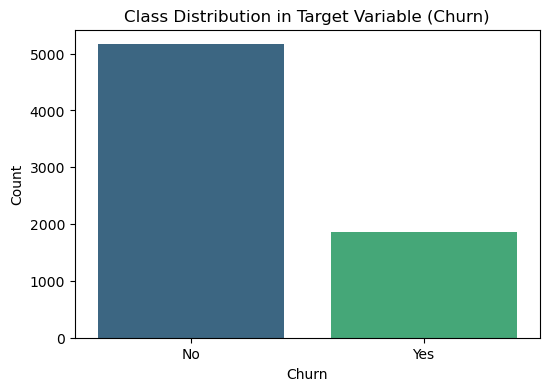

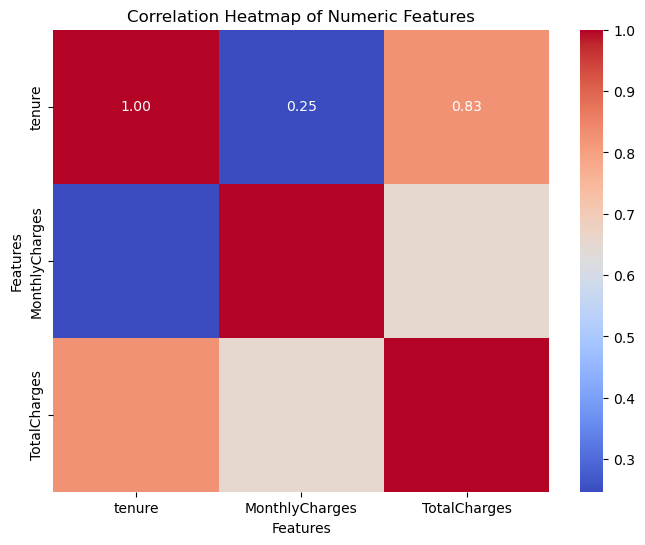

C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


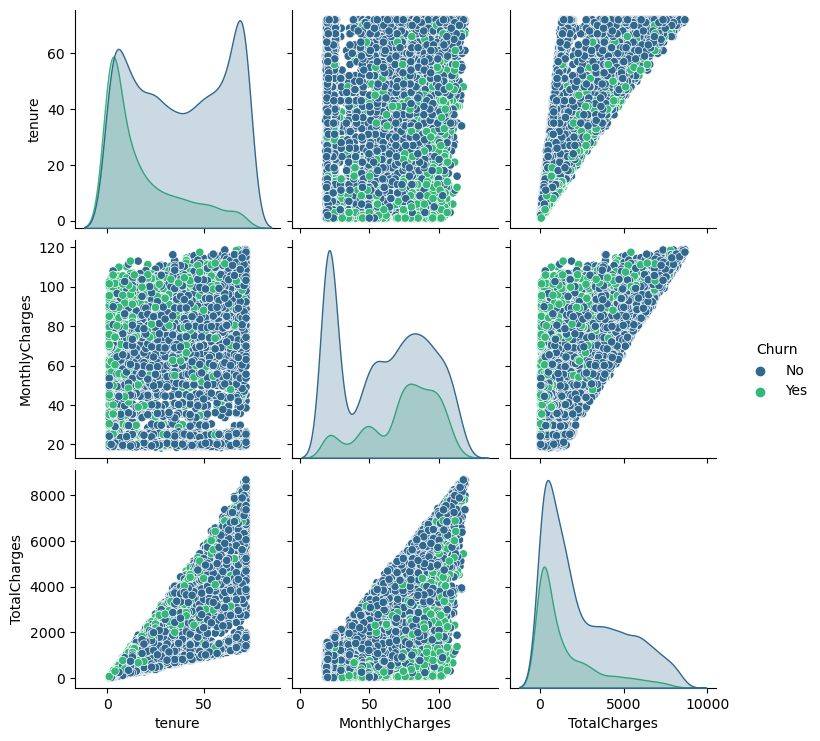

Value counts for gender:
gender
Male      3549
Female    3483
Name: count, dtype: int64

Value counts for Partner:
Partner
No     3639
Yes    3393
Name: count, dtype: int64

Value counts for Dependents:
Dependents
No     4933
Yes    2099
Name: count, dtype: int64

Value counts for PhoneService:
PhoneService
Yes    6352
No      680
Name: count, dtype: int64

Value counts for MultipleLines:
MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: count, dtype: int64

Value counts for InternetService:
InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64

Value counts for OnlineSecurity:
OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64

Value counts for OnlineBackup:
OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64

Value counts for DeviceProtection:
Device

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution for the target variable 'Churn'
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=telco_data_cleaned, palette='viridis')
plt.title('Class Distribution in Target Variable (Churn)')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Check numeric feature distributions
telco_data_cleaned.describe()

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
correlation_matrix = telco_data_cleaned[numeric_features].corr()

# Correlation heatmap of numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numeric Features')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# Pairplot to observe relationships between numeric features
sns.pairplot(telco_data_cleaned, vars=numeric_features, hue='Churn', palette='viridis')
plt.show()

# Summary of categorical variables
categorical_columns = telco_data_cleaned.select_dtypes(include='object').columns
for column in categorical_columns:
    print(f"Value counts for {column}:\n{telco_data_cleaned[column].value_counts()}\n")


C:\Users\shash\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


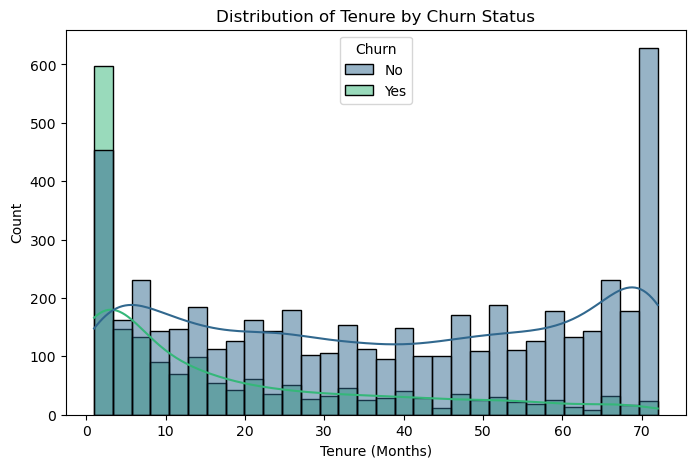

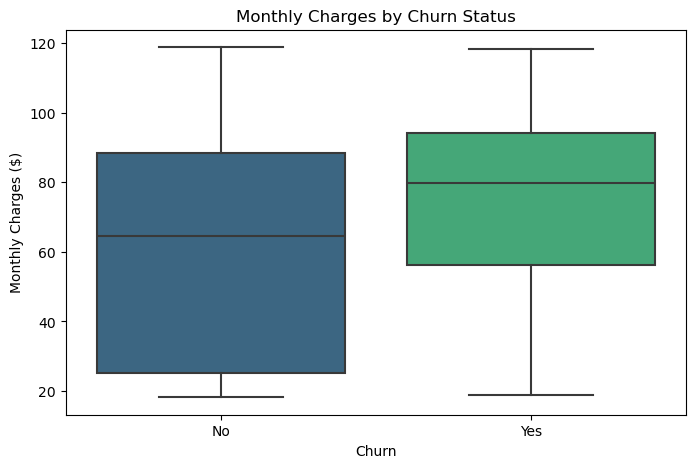

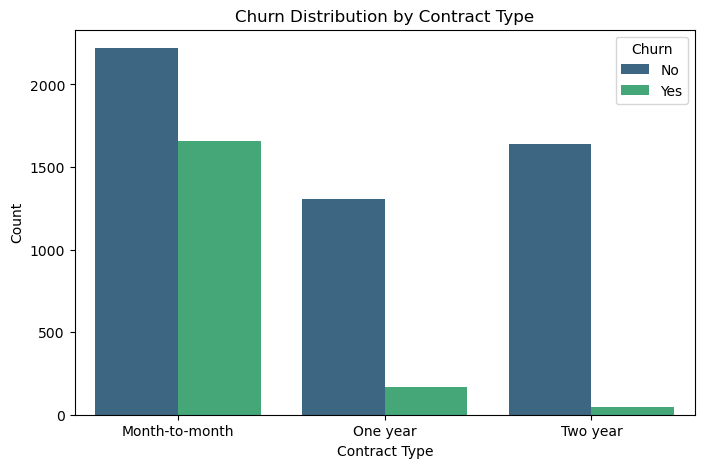

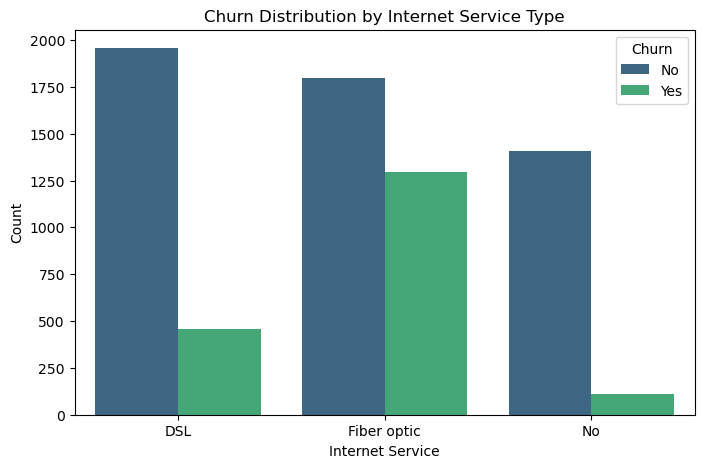

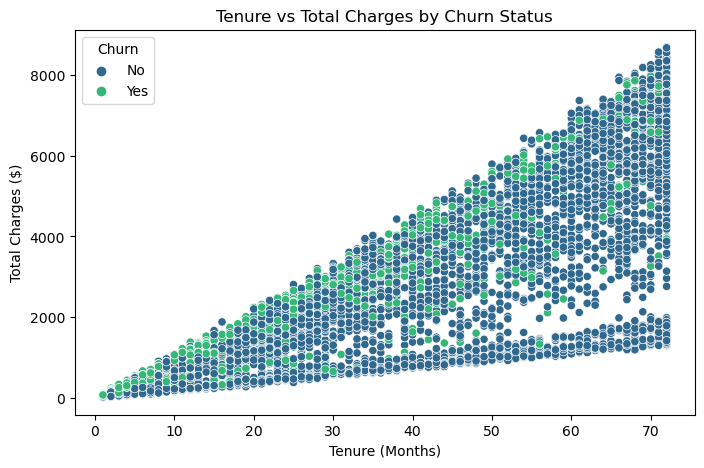

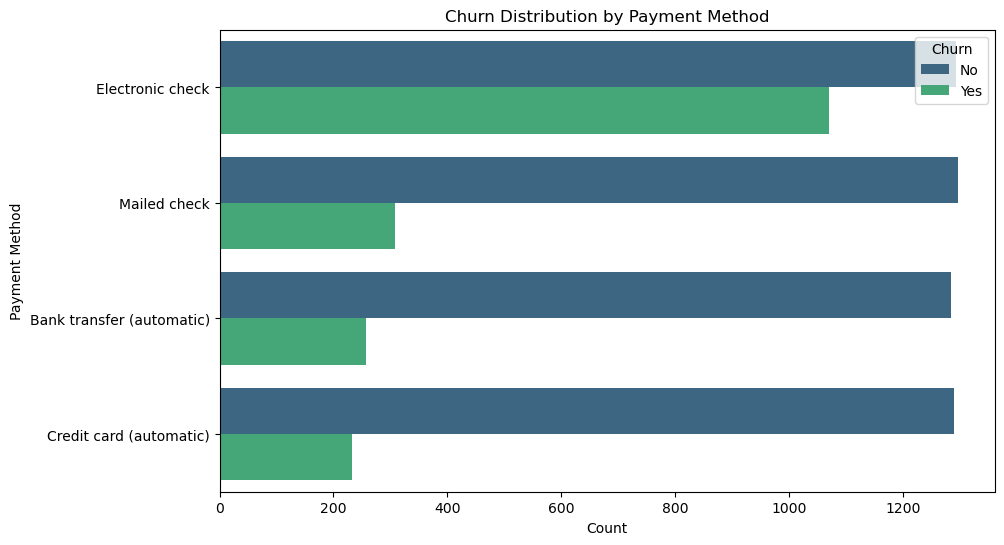

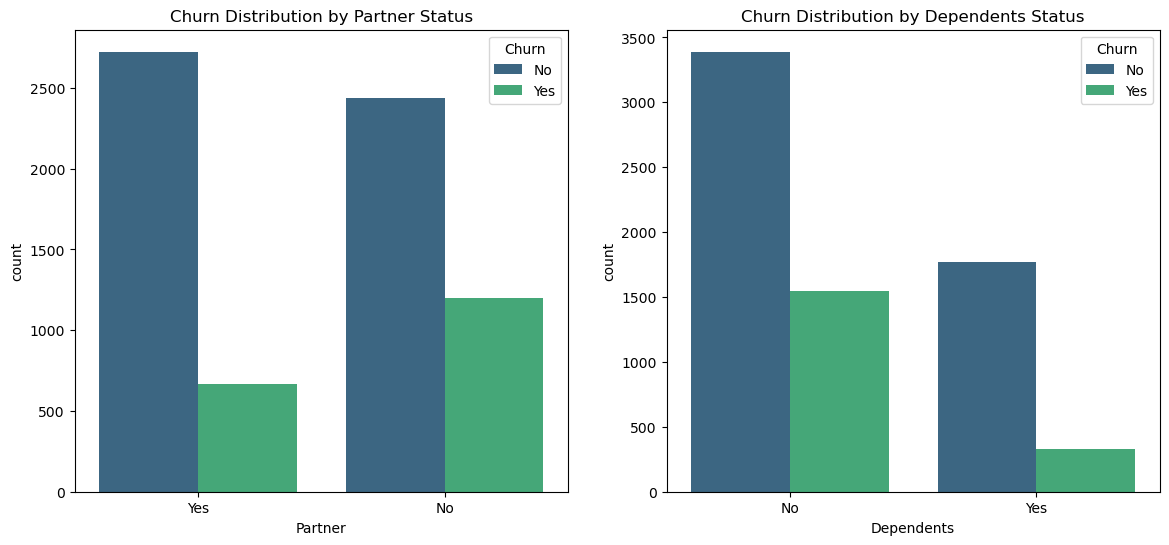

In [5]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of tenure for Churn and Non-Churn customers
plt.figure(figsize=(8, 5))
sns.histplot(data=telco_data_cleaned, x='tenure', hue='Churn', kde=True, palette='viridis', bins=30)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Count')
plt.show()

# Average Monthly Charges for Churn and Non-Churn customers
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=telco_data_cleaned, palette='viridis')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.show()

# Churn distribution by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(data=telco_data_cleaned, x='Contract', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Churn distribution by Internet Service
plt.figure(figsize=(8, 5))
sns.countplot(data=telco_data_cleaned, x='InternetService', hue='Churn', palette='viridis')
plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

# Tenure vs. Total Charges with Churn overlay
plt.figure(figsize=(8, 5))
sns.scatterplot(data=telco_data_cleaned, x='tenure', y='TotalCharges', hue='Churn', palette='viridis')
plt.title('Tenure vs Total Charges by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Total Charges ($)')
plt.show()

# Payment Method Distribution and Churn
plt.figure(figsize=(10, 6))
sns.countplot(data=telco_data_cleaned, y='PaymentMethod', hue='Churn', palette='viridis', order=telco_data_cleaned['PaymentMethod'].value_counts().index)
plt.title('Churn Distribution by Payment Method')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

# Partner and Dependents Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=telco_data_cleaned, x='Partner', hue='Churn', ax=axes[0], palette='viridis')
axes[0].set_title('Churn Distribution by Partner Status')
sns.countplot(data=telco_data_cleaned, x='Dependents', hue='Churn', ax=axes[1], palette='viridis')
axes[1].set_title('Churn Distribution by Dependents Status')
plt.show()


# Encoding and correlation

In [6]:
telco_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   object  
 1   SeniorCitizen     7032 non-null   int64   
 2   Partner           7032 non-null   object  
 3   Dependents        7032 non-null   object  
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   object  
 6   MultipleLines     7032 non-null   object  
 7   InternetService   7032 non-null   object  
 8   OnlineSecurity    7032 non-null   object  
 9   OnlineBackup      7032 non-null   object  
 10  DeviceProtection  7032 non-null   object  
 11  TechSupport       7032 non-null   object  
 12  StreamingTV       7032 non-null   object  
 13  StreamingMovies   7032 non-null   object  
 14  Contract          7032 non-null   object  
 15  PaperlessBilling  7032 non-null   object  
 16  PaymentMethod     7032 non-nu

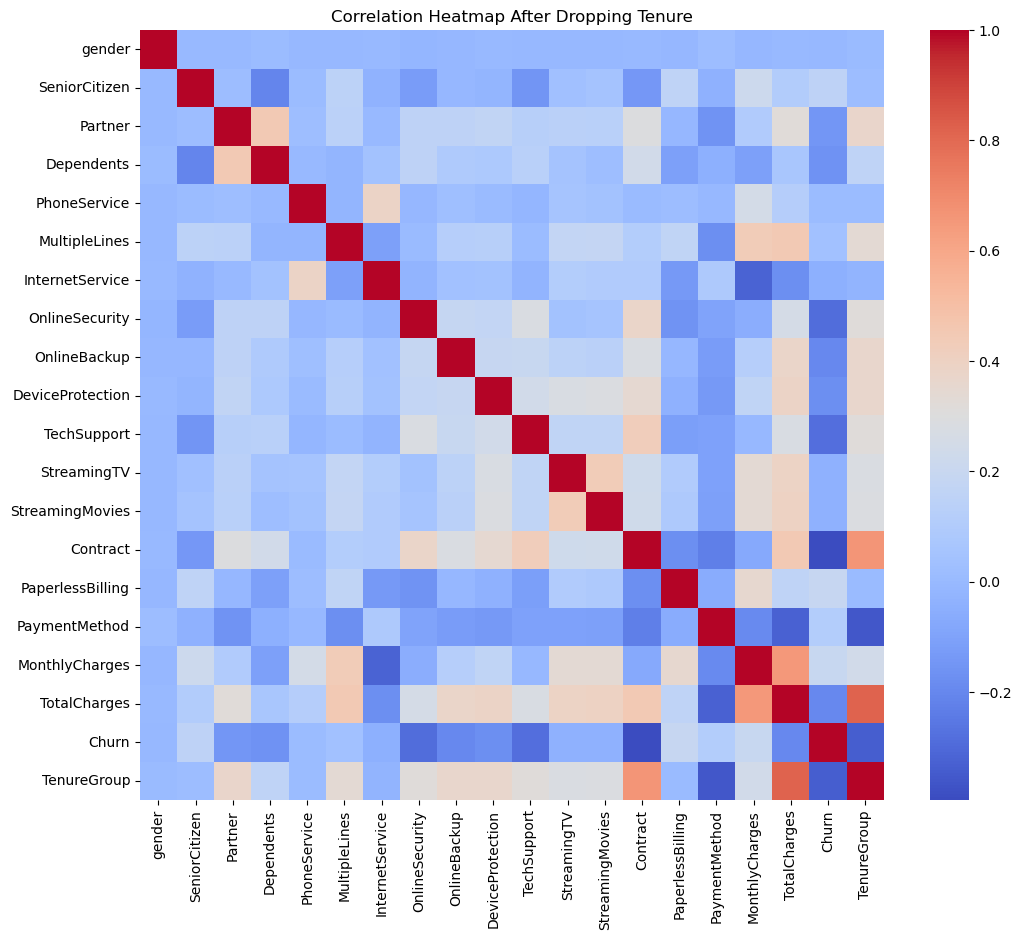

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
gender,1.000000,-0.001819,-0.001379,0.010349,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545,0.005966
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541,0.016019
Partner,-0.001379,0.016957,1.000000,0.452269,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982,0.369851
Dependents,0.010349,-0.210550,0.452269,1.000000,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128,0.157483
PhoneService,-0.007515,0.008392,0.018397,-0.001078,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691,0.007497
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043,0.335205
InternetService,-0.002236,-0.032160,0.000513,0.044030,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097,-0.029234
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050,0.316489
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290,0.366634
DeviceProtection,0.001348,-0.021124,0.165614,0.079723,0.004718,0.122614,0.045558,0.175789,0.187646,1.000000,0.240476,0.275947,0.289309,0.350067,-0.037596,-0.136460,0.163984,0.389066,-0.177883,0.362252


In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# List of categorical columns to encode
categorical_columns = telco_data_cleaned.select_dtypes(include='object').columns

# Encode each categorical column
for column in categorical_columns:
    if column != 'Churn' or column != 'TenureGroup':
        telco_data_cleaned[column] = encoder.fit_transform(telco_data_cleaned[column])
        
telco_data_cleaned['TenureGroup'] = encoder.fit_transform(telco_data_cleaned['TenureGroup'])

# Encode the target variable (Churn)
telco_data_cleaned['Churn'] = encoder.fit_transform(telco_data_cleaned['Churn'])

# Drop the original 'tenure' column since we now have 'TenureGroup'
telco_data_cleaned = telco_data_cleaned.drop(columns=['tenure'])

# Recompute correlation matrix for the dataset
correlation_encoded = telco_data_cleaned.corr()

# Plot the correlation heatmap for the entire dataset after dropping 'tenure'
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_encoded, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap After Dropping Tenure')
plt.show()

# Display the correlation matrix for further inspection
correlation_encoded

# Feature Selection

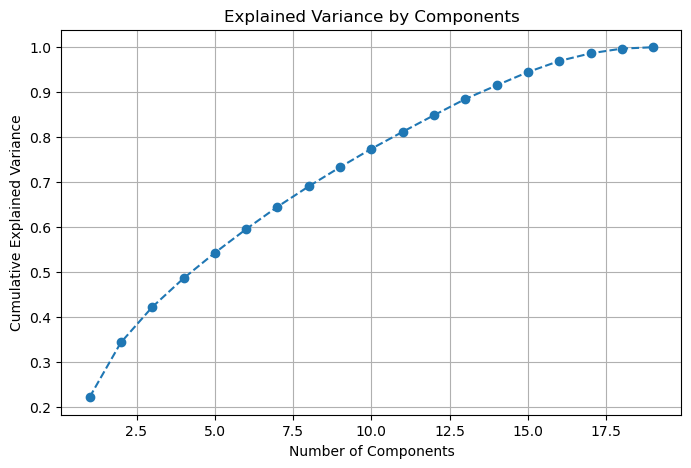

Number of components to retain for 95.0% variance: 16
Shape of the dataset after PCA: (7032, 16)


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardize the data
X = telco_data_cleaned.drop(columns=['Churn'])
y = telco_data_cleaned['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

# Determine the number of components to retain (e.g., 95% variance)
explained_variance_threshold = 0.95
n_components = sum(pca.explained_variance_ratio_.cumsum() <= explained_variance_threshold) + 1
print(f"Number of components to retain for {explained_variance_threshold * 100}% variance: {n_components}")

# Reduce the dataset to the chosen number of components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Display the shape of the reduced dataset
print(f"Shape of the dataset after PCA: {X_reduced.shape}")


In [15]:
# Retrieve the PCA components and corresponding feature weights
pca_components = pd.DataFrame(pca.components_, columns=X.columns)

# Display the top features contributing to each principal component
top_features_per_component = {}
for i, component in enumerate(pca.components_):
    top_features = [X.columns[j] for j in component.argsort()[-5:][::-1]]  # Top 5 features
    top_features_per_component[f'PC{i+1}'] = top_features

# Convert to a DataFrame for display
top_features_df = pd.DataFrame(top_features_per_component)

top_features_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,TotalCharges,MonthlyCharges,OnlineSecurity,TechSupport,StreamingTV,gender,SeniorCitizen,PaymentMethod,OnlineSecurity,PaperlessBilling,DeviceProtection,StreamingTV,TechSupport,MultipleLines,StreamingTV,Dependents
1,TenureGroup,PaperlessBilling,MultipleLines,DeviceProtection,StreamingMovies,SeniorCitizen,InternetService,OnlineBackup,PaymentMethod,SeniorCitizen,OnlineBackup,StreamingMovies,SeniorCitizen,TechSupport,SeniorCitizen,SeniorCitizen
2,Contract,SeniorCitizen,TenureGroup,StreamingMovies,PaymentMethod,TenureGroup,Partner,SeniorCitizen,SeniorCitizen,TechSupport,MonthlyCharges,OnlineBackup,MultipleLines,OnlineSecurity,DeviceProtection,Contract
3,DeviceProtection,MultipleLines,Partner,OnlineSecurity,Dependents,InternetService,DeviceProtection,OnlineSecurity,PhoneService,OnlineSecurity,PhoneService,MonthlyCharges,PhoneService,Dependents,OnlineSecurity,TenureGroup
4,StreamingMovies,TotalCharges,Dependents,StreamingTV,DeviceProtection,MultipleLines,Contract,Partner,MonthlyCharges,Partner,Dependents,SeniorCitizen,PaymentMethod,DeviceProtection,Contract,PhoneService


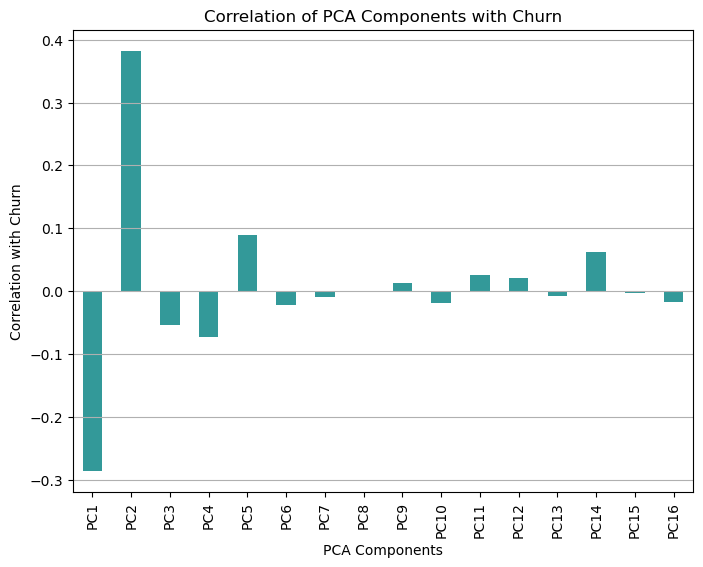

PC1    -0.286001
PC2     0.382460
PC3    -0.054219
PC4    -0.073177
PC5     0.089529
PC6    -0.022406
PC7    -0.008875
PC8    -0.000867
PC9     0.012745
PC10   -0.018632
PC11    0.024768
PC12    0.021514
PC13   -0.007858
PC14    0.061834
PC15   -0.003035
PC16   -0.017446
Name: Churn, dtype: float64

In [16]:
# Add the target variable (Churn) back to the PCA-transformed dataset
pca_df_with_churn = pd.DataFrame(X_reduced, columns=[f'PC{i+1}' for i in range(X_reduced.shape[1])])
pca_df_with_churn['Churn'] = y.reset_index(drop=True)

# Compute correlation of PCA components with the target variable (Churn)
correlation_with_churn = pca_df_with_churn.corr()['Churn'].iloc[:-1]  # Exclude the correlation of Churn with itself

# Plot the correlation between PCA components and Churn
plt.figure(figsize=(8, 6))
correlation_with_churn.plot(kind='bar', color='teal', alpha=0.8)
plt.title('Correlation of PCA Components with Churn')
plt.xlabel('PCA Components')
plt.ylabel('Correlation with Churn')
plt.grid(axis='y')
plt.show()

# Display the correlation values
correlation_with_churn


In [17]:
# Define a threshold for correlation
correlation_threshold = 0.05

# Select components with absolute correlation above the threshold
selected_pca_components = correlation_with_churn[correlation_with_churn.abs() > correlation_threshold]

# Display selected components and their correlations
print("Selected PCA Components based on Correlation Threshold:")
print(selected_pca_components)

# Filter the dataset to retain only the selected PCA components
X_selected_pca = pca_df_with_churn[selected_pca_components.index]

# Shape of the reduced PCA dataset
print(f"Shape of the dataset after selecting top PCA components: {X_selected_pca.shape}")


Selected PCA Components based on Correlation Threshold:
PC1    -0.286001
PC2     0.382460
PC3    -0.054219
PC4    -0.073177
PC5     0.089529
PC14    0.061834
Name: Churn, dtype: float64
Shape of the dataset after selecting top PCA components: (7032, 6)


# Premodel run

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Use the top selected PCA components as features
X_selected_pca = pca_df_with_churn[selected_pca_components.index]
y = pca_df_with_churn['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy of Random Forest Model: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report_output)



Accuracy of Random Forest Model: 0.7662

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      1033
           1       0.57      0.49      0.53       374

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407

